# Spam Email detection Baseline Models
Prepared By Deepa Francis<br>
For BrainStation<br>
On July 31, 2023

# Table of Contents
[1. Configuring Resources](#cr) <br>
- [1.1. Set up Libraries](#sl) <br>
- [1.2. Load Data](#ld) <br>
- [1.3. Summary Satistics](#ss) <br>

[2. Logistic Regression](#lr) <br>
- [2.1. xxx](#xxx) <br>

[3. PCA](#pca) <br>
- [3.1. xxx](#xxx) <br>

[4. SVM](#svm) <br>
- [4.1. xxx](#xxx) <br>

[5. Random Forest](#rf) <br>
- [5.1. xxx](#xxx) <br>

[6.Naive Bayes](#nb) <br>
- [6.1. xxx](#xxx) <br>

[7. XGBoost](#xgb) <br>
- [7.1. xxx](#xxx) <br>

<a id = "cr"></a>
## 1. Configuring Resources

A baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models.
Baseline models usually lack complexity and may have little predictive power. Regardless, their inclusion is a necessity for many reasons.
Here, we are going to develop 6 baseline models for comparison and we will explore how hyperparameter optimization is used to find the best tuning parameter. Further, we use grid search for fine tuning these parameters.

<a id = "sl"></a>
### 1.1. Setting up Libraries

In [9]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# display all columns in dataframe
pd.set_option('display.max_columns', None)

<a id = "ld"></a>
### 1.2. Load Data

In [2]:
# Load the data
X_train = pd.read_csv('X_train.csv') 
X_test = pd.read_csv('X_test.csv') 
X_validation = pd.read_csv('X_validation.csv') 

y_train = pd.read_csv('y_train.csv') 
y_test = pd.read_csv('y_test.csv') 
y_validation = pd.read_csv('y_validation.csv') 

In [3]:
# Check the sahpes
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of X_validation is {X_validation.shape}')

The shape of X_train is (22400, 228)
The shape of X_test is (12000, 228)
The shape of X_validation is (5600, 228)


Check for any null values

In [4]:
X_train.isna().sum().sum()

0

In [5]:
X_test.isna().sum().sum()

0

In [6]:
X_validation.isna().sum().sum()

0

<a id = "ss"></a>
### 1.3. Summary Statistics

In [7]:
# Summary statistics
X_train.describe()

,subject_Word_Count_clipped,message_Word_Count_clipped,email_from_hash_0,email_from_hash_1,email_from_hash_2,email_from_hash_3,email_from_hash_4,email_from_hash_5,email_from_hash_6,email_from_hash_7,email_from_hash_8,email_from_hash_9,email_from_hash_10,email_from_hash_11,email_from_hash_12,email_from_hash_13,email_from_hash_14,email_from_hash_15,email_from_hash_16,email_from_hash_17,email_from_hash_18,email_from_hash_19,email_from_hash_20,email_from_hash_21,email_from_hash_22,email_from_hash_23,email_from_hash_24,email_from_hash_25,email_from_hash_26,email_from_hash_27,email_from_hash_28,email_from_hash_29,email_from_hash_30,email_from_hash_31,email_from_hash_32,email_from_hash_33,email_from_hash_34,email_from_hash_35,email_from_hash_36,email_from_hash_37,email_from_hash_38,email_from_hash_39,email_from_hash_40,email_from_hash_41,email_from_hash_42,email_from_hash_43,email_from_hash_44,email_from_hash_45,email_from_hash_46,email_from_hash_47,email_from_hash_48,email_from_hash_49,email_from_hash_50,email_from_hash_51,email_from_hash_52,email_from_hash_53,email_from_hash_54,email_from_hash_55,email_from_hash_56,email_from_hash_57,email_from_hash_58,email_from_hash_59,email_from_hash_60,email_from_hash_61,email_from_hash_62,email_from_hash_63,email_from_hash_64,email_from_hash_65,email_from_hash_66,email_from_hash_67,email_from_hash_68,email_from_hash_69,host_transform__from_host_Others,host_transform__from_host_gmail,host_transform__from_host_gmx,host_transform__from_host_hotmail,host_transform__from_host_mail,host_transform__from_host_yahoo,domain_transform__from_domain_Others,domain_transform__from_domain_ca,domain_transform__from_domain_com,domain_transform__from_domain_edu,domain_transform__from_domain_net,domain_transform__from_domain_org,domain_transform__from_domain_uk,prominent_topic_0,prominent_topic_1,prominent_topic_2,prominent_topic_3,prominent_topic_4,subject_alert,subject_best,subject_branch,subject_bush,subject_cnn,subject_commit,subject_data,subject_discount,subject_dont,subject_file,subject_function,subject_help,subject_iphealth,subject_make,subject_medic,subject_mhln,subject_need,subject_new,subject_news,subject_notif,subject_patch,subject_perl,subject_pill,subject_price,subject_problem,subject_question,subject_rev,subject_samba,subject_ship,subject_softwar,subject_stock,subject_sugar,subject_svn,subject_test,subject_time,subject_use,subject_viagra,subject_want,message_ad,message_altern,message_avail,message_back,message_base,message_best,message_bit,message_boundari,message_ca,message_call,message_chang,message_check,message_click,message_code,message_come,message_contact,message_could,message_current,message_data,message_day,message_de,message_dear,message_en,message_end,message_even,message_file,message_find,message_first,message_follow,message_free,message_gener,message_gif,message_give,message_go,message_good,message_guid,message_help,message_hi,message_high,message_id,message_imag,message_inform,message_iso,message_know,message_last,message_list,message_look,message_mailman,message_make,message_mani,message_math,message_may,message_messag,message_minim,message_much,message_na,message_name,message_need,message_net,message_new,message_news,message_one,message_peopl,message_pleas,message_post,message_price,message_printabl,message_project,message_provid,message_read,message_receiv,message_reproduc,message_right,message_run,message_said,message_say,message_see,message_self,message_servic,message_set,message_st,message_system,message_take,message_th,message_thank,message_think,message_time,message_tri,message_two,message_type,message_us,message_use,message_version,message_want,message_way,message_well,message_work,message_world,message_wrote,message_ye
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.00

We have a mix of numerical features and binary categorical features. The choice of feature scaling method depends on the nature of the features and the algorithm we plan to use.<br>

- For numerical features, it's often a good idea to scale them to a similar range to avoid issues caused by different scales. Two common scalers used for numerical features are Min-Max scaling and Standardization (Z-score scaling).<br>
- For binary categorical features, scaling is not necessary since they already have a fixed range (0 or 1).<br>

For simplicity of coding, we choose a single scaling technique that can take care of both numerical and binary features, and that is MinMax scaling.<br>

MinMax scaling scales all the features to a fixed range, typically [0, 1]. It works for numerical features as well as binary features. For numerical features, it linearly scales the values to the specified range. For binary features, it maps the minimum value to 0 and the maximum value to 1.

<a id = "lr"></a>
## 2. Logistic Regression

First, we are going to evaluate Logistic Regression model with default parameters.

In [10]:
# Define the steps for the Logistic Regression pipeline
my_pipeline = [('scaler', MinMaxScaler()), 
                   ('model', LogisticRegression())
            ]
pipeline = Pipeline(my_pipeline)
pipeline.fit(X_train, y_train)
# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'Train accuracy is {train_accuracy*100:.2f}')
    
# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy is 95.96
Test accuracy is 90.27

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6000
           1       0.90      0.90      0.90      6000

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



Next, we are going to find the optimized c-values by looking at the train and validation accuracies for a range of c-values.

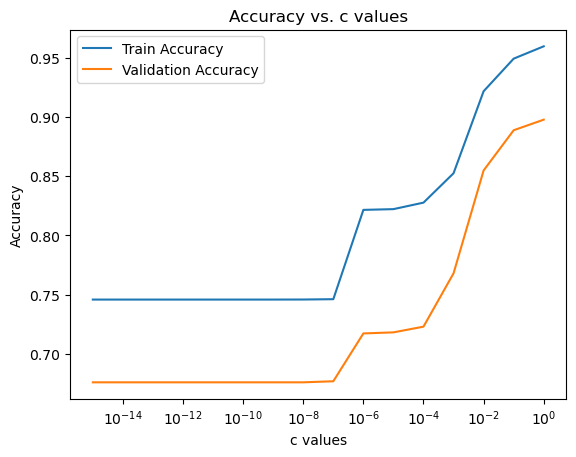

In [31]:
# Initialize lists to store c_values and accuracies
c_values = 10.**np.arange(-15,1)
train_scores = []
val_scores = []

for c in c_values:
    
#Define the steps for the Logistic Regression pipeline
    my_pipeline = [('scaler', MinMaxScaler()), 
                   ('model', LogisticRegression(C=c))
                    ]
 
    pipeline = Pipeline(my_pipeline)
    pipeline.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate validation accuracy
    val_accuracy = pipeline.score(X_validation, y_validation)
    val_scores.append(val_accuracy)
    
# Plot the graph
plt.plot(c_values, train_scores, label='Train Accuracy')
plt.plot(c_values, val_scores, label='Validation Accuracy')
plt.xlabel('c values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. c values')
plt.xscale('log')
plt.legend()
plt.show()

Find the best c-value where the validation accuracy is atleast 75% and where the train and validation accuracies are the most closely matched.

In [27]:
# Find the indices where val_scores > 0.75
val_indices = np.where(np.array(val_scores) > 0.75)[0]

# Calculate the absolute difference between train_scores and val_scores
abs_diff = np.abs(np.array(train_scores) - np.array(val_scores))

# Find the index with the minimum absolute difference among the selected indices
valid_indices = val_indices[abs_diff[val_indices].argmin()]

# Get the corresponding best_n_features value
best_c_value = c_values[valid_indices]

print(f'The best c value is {best_c_value}')

The best c value is 0.1


Check the accuracies with the best c value obtained.

In [28]:
my_pipeline = [('scaler', MinMaxScaler()), 
                   ('model', LogisticRegression(C=best_c_value))
                    ]
pipeline = Pipeline(my_pipeline)
pipeline.fit(X_train, y_train)
    
# Calculate train accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f'The best train accuracy is {train_accuracy*100:.2f}')

# Calculate validation accuracy
val_accuracy = pipeline.score(X_validation, y_validation)
print(f'The best validation accuracy is {val_accuracy*100:.2f}')

# Calculate test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f'The best test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
print(classification_report(y_test, y_pred))

The best train accuracy is 94.92
The best validation accuracy is 88.88
The best test accuracy is 89.60

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6000
           1       0.90      0.90      0.90      6000

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



Now we are going to perform grid search for fine tuning the c value.

In [33]:
# Step 1: Create the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  
    ('logistic_regression', LogisticRegression())
])

# Step 2: Define hyperparameters for grid search
param_grid = {'logistic_regression__C': [0.009,0.0095,0.1,0.105,0.11],
    'logistic_regression__penalty': ['l1', 'l2']
}

# Step 3: Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 4: Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_c_value = best_params['logistic_regression__C']
best_penalty = best_params['logistic_regression__penalty']

# Step 5: Fit the pipeline on the training data with the best hyperparameters
pipeline.set_params(logistic_regression__C=best_c_value, 
                    logistic_regression__penalty=best_penalty)
pipeline.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model
train_accuracy = pipeline.score(X_train, y_train)
grid_accuracy = grid_search.best_score_
val_accuracy = pipeline.score(X_validation, y_validation)
test_accuracy = pipeline.score(X_test, y_test)

print(f'The best C value for Logistic Regression is {best_c_value}')
print(f'The best penalty for Logistic Regression is {best_penalty}')

print('')
print(f'The train accuracy is {train_accuracy*100:.2f}')
print(f'The cross validation accuracy is {grid_accuracy*100:.2f}')
print(f'The validation accuracy is {val_accuracy*100:.2f}')
print(f'The test accuracy is {test_accuracy*100:.2f}')

print('')
print('Classification Report')
print(classification_report(y_test, y_pred))

The best C value for Logistic Regression is 0.11
The best penalty for Logistic Regression is l2

The train accuracy is 94.95
The cross validation accuracy is 94.66
The validation accuracy is 88.93
The test accuracy is 89.73

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6000
           1       0.90      0.90      0.90      6000

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



- The optimal hyperparameters were found to be a C value of 0.11 and an l2 penalty. The model achieved high accuracy on both the training set (94.95%) and the cross-validation set (94.66%), demonstrating its effectiveness in generalization. 
- However, a slightly lower accuracy was observed on the validation set (88.93%) and the test set (89.73%), indicating some overfitting. 
- Here we acknowledge the fact that there is data leakage while using grid search as the feature encoding was done outside the grid. This the reason of higher grid score when compared to validation accuracy score.
- The classification report shows that the model performed well in classifying both classes (0 and 1) with high precision, recall, and F1-score, resulting in an overall accuracy of 90% on the test set.